In [3]:
import torch

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from main.models import ConvNet
from main.utils import save_experiment, generate_experiment_id
from dataclasses import dataclass
from main.active_learning import run_active_learning
from main.prepare_data import create_repeated_MNIST_dataloaders

sns.set_palette(sns.color_palette("Spectral"))

%reload_ext autoreload
%autoreload 2

## Settings for Active Learning

In [4]:
# set configurations
@dataclass
class ActiveLearningConfig:
    subset_of_weights: str = 'last_layer'
    hessian_structure: str = 'kron'
    backend: str = 'AsdlGGN'
    temperature: float = 1.0
    max_training_samples: int = 100
    acquisition_batch_size: int = 5
    al_method: str = 'random'
    test_batch_size: int = 512
    num_classes: int = 10
    num_initial_samples: int = 40
    training_iterations: int = 4096 // 400
    scoring_batch_size: int = 64
    train_batch_size: int = 64
    extract_pool: int = 0
    num_repeats: int = 5
    samples_per_digit: int = 100

experiment_name = '5x_redundant_random'  # provide descriptive name for the experiment
experiment_name += generate_experiment_id()

config = ActiveLearningConfig()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

save_results = True

Using device: cpu


## Load and Prepare Data

In [16]:
train_loader, test_loader, pool_loader, active_learning_data = create_repeated_MNIST_dataloaders(
    config)

c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\torch\utils\data\sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument is not used and will be removed in 2.2.0."


## Runs Active Learning with settings

In [17]:
results = run_active_learning(
    train_loader=train_loader,
    test_loader=test_loader, 
    pool_loader=pool_loader,
    active_learning_data=active_learning_data,
    model_constructor=ConvNet, 
    config=config, 
    device=device
    )

Training Set Size:  40%|████      | 40/100 [00:00<?, ?it/s]2024-07-29 10:16:01,122 - INFO - Training set size: 40, Test set accuracy: 10.21, Test set loss: -0.0000
c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\torch\nn\modules\module.py:1373: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
c:\Users\vince\Documents\Statistics\TT\msc_thesis\.venv\Lib\site-packages\laplace\baselaplace.py:409: UserWarning: By default `link_approx` is `probit`. Make sure to set it equals to the way you want to call `la(test_data, pred_type=..., link_approx=...)`.
  warnings.warn(
Training Set Size:  45%|████▌     | 45/100 [00:04<00:47,  1.15it/s]

Dataset indices:  [4237 1660 4126 3638 2580]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([1, 1, 1, 4, 7])


2024-07-29 10:16:05,350 - INFO - Training set size: 45, Test set accuracy: 18.54, Test set loss: -0.0000
Training Set Size:  50%|█████     | 50/100 [00:08<00:42,  1.18it/s]

Dataset indices:  [ 228  796 2622   17  268]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([5, 1, 3, 1, 8])


2024-07-29 10:16:09,635 - INFO - Training set size: 50, Test set accuracy: 11.69, Test set loss: -0.0000
Training Set Size:  55%|█████▌    | 55/100 [00:12<00:38,  1.16it/s]

Dataset indices:  [2999 1667 2024  359 4417]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([4, 7, 4, 0, 4])


2024-07-29 10:16:13,649 - INFO - Training set size: 55, Test set accuracy: 12.89, Test set loss: -0.0000
Training Set Size:  60%|██████    | 60/100 [00:16<00:33,  1.20it/s]

Dataset indices:  [2009  284 2268 1361 4888]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([9, 1, 8, 4, 7])


2024-07-29 10:16:17,841 - INFO - Training set size: 60, Test set accuracy: 17.35, Test set loss: -0.0000
Training Set Size:  65%|██████▌   | 65/100 [00:21<00:29,  1.20it/s]

Dataset indices:  [ 883  159 1590 1588 2075]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([8, 0, 7, 5, 7])


2024-07-29 10:16:22,088 - INFO - Training set size: 65, Test set accuracy: 9.74, Test set loss: -0.0001
Training Set Size:  70%|███████   | 70/100 [00:25<00:25,  1.19it/s]

Dataset indices:  [ 534  171 3772 1403  877]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([9, 7, 1, 7, 3])


2024-07-29 10:16:26,347 - INFO - Training set size: 70, Test set accuracy: 10.79, Test set loss: 0.0000
Training Set Size:  75%|███████▌  | 75/100 [00:29<00:21,  1.17it/s]

Dataset indices:  [1184 3268  308 1645  203]
Scores:  [0, 0, 0, 0, 0]
Labels:  tensor([6, 8, 6, 9, 1])


: 

## Analyse Results

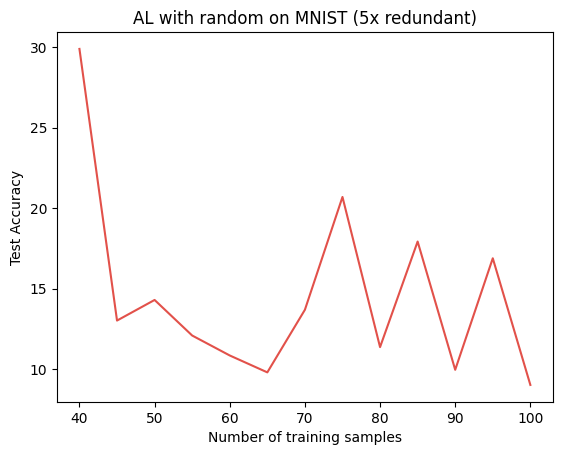

In [ ]:
sns.lineplot(x=np.arange(start=config.num_initial_samples, stop=config.max_training_samples + 1, step=config.acquisition_batch_size),
            y=results['test_accs'])
plt.title(f'AL with {config.al_method} on MNIST (5x redundant)')
plt.xlabel('Number of training samples')
plt.ylabel('Test Accuracy')
plt.show()


Text(0, 0.5, 'Number of unique labels')

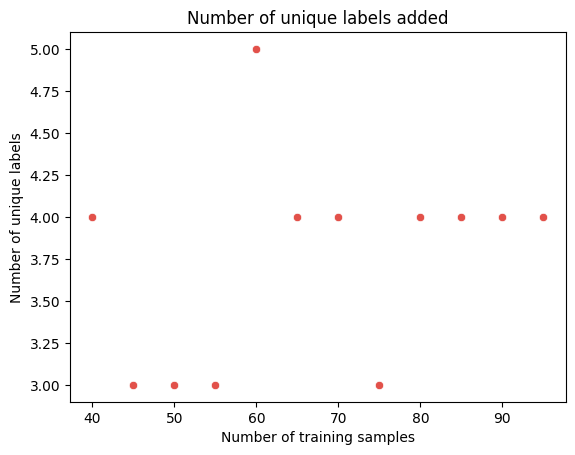

In [ ]:
labels = torch.stack(results['added_labels'])

labels_added = [len(labels[i].unique())  for i in range(labels.shape[0])]

sns.scatterplot(x=np.arange(start=config.num_initial_samples, stop=config.max_training_samples, step=config.acquisition_batch_size),
             y=labels_added)
plt.title('Number of unique labels added')
plt.xlabel('Number of training samples')
plt.ylabel('Number of unique labels')

## Save Experiment Results

In [ ]:
if save_results:
    save_experiment(config, results, experiment_name)

Experiment saved in experiments\5x_redundant_random20240726-214058
